Importing dependencies

======================================================================

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
from fastai.vision import *
from fastai import *
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from tqdm.notebook import tqdm
import gc
from pylab import imread,subplot,imshow,show
%matplotlib inline

Setting path to the data set

======================================================================

In [ ]:
path_to_dataset = r'Enter directory name where dataset is present'
path = Path(path_to_dataset)
print(path)

Loading data from the folder

======================================================================

In [3]:
size = 224
bs = 64
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=get_transforms(max_rotate=0.1,max_lighting=0.15),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs)


Display batches

======================================================================

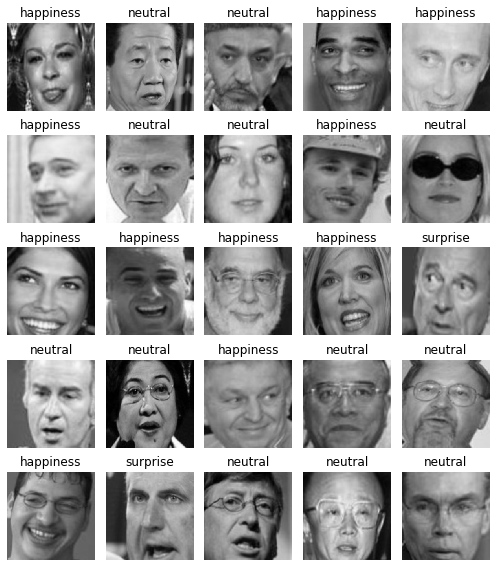

In [4]:
data.show_batch(rows=5, figsize=(7, 8))

Types of classes found

======================================================================

In [5]:
data.classes

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

Select model

======================================================================

In [6]:
arch = models.resnet18

In [7]:
learn = cnn_learner(data, arch, metrics=[accuracy], model_dir = Path("."),path = Path("."))

Find the learning rate

======================================================================

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


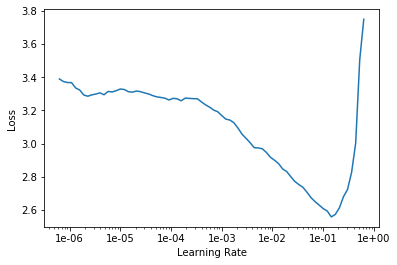

In [8]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

Set the range for learning rate

======================================================================

In [9]:
lr1 = 1e-3
lr2 = 1e-1

Start training

======================================================================

In [10]:
learn.fit_one_cycle(14,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.011371,0.899082,0.713241,02:59
1,0.743597,0.597746,0.806876,01:52
2,0.865933,0.888465,0.747257,01:52
3,0.920816,0.834745,0.812363,01:54
4,0.881279,0.854846,0.787125,01:53
5,0.880715,1.122557,0.782004,01:53
6,0.948977,0.729618,0.817849,01:53
7,0.621264,0.473688,0.844916,01:53
8,0.578504,0.575723,0.826993,01:53
9,0.530720,0.623550,0.817849,01:53


In [ ]:
learn.unfreeze()

Export the model

======================================================================

In [11]:
learn.export()

Load the model

======================================================================

In [5]:
path_to_trained_model = r'ENter directory where trained model was saved'
learn = load_learner(path_to_trained_model)

Testing the model

======================================================================

In [6]:
img = open_image('happy.jpg')
type(img)

fastai.vision.image.Image

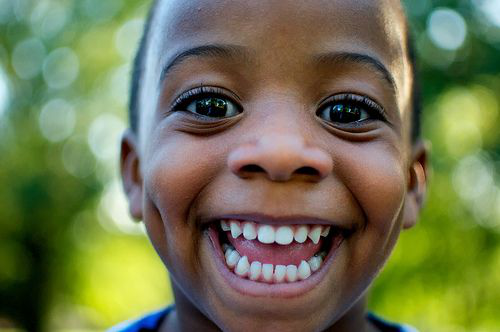

In [7]:
img

In [8]:
pred_class, pred_idx, outputs = learn.predict(img)

In [9]:
pred_class, pred_idx, outputs

(Category happiness,
 tensor(3),
 tensor([6.2531e-04, 1.2135e-02, 1.0862e-03, 9.6239e-01, 3.3673e-03, 1.9985e-02,
         4.1485e-04]))

In [11]:
pred_class

Category happiness